# Assignment 4

Brittany Howard

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1
Using from Equations 3.5 and 3.29 in your notes derive an expression for the ionised fraction of Hydrogen using the baryon-to-photon ratio $\eta$ instead of the baryon density $n_b$. You may further use the result that, since the CMB follows the Planck distribution, $n_\gamma =0.243(kT/\hbar c)^3$. Plot the fractional ionisation $X$ as a function of temperature in the range 3000 K < T < 4500 K. Plot two curves – one assuming $\eta = 4\times10^{−10}$ and the second assuming $\eta = 8\times10^{−10}$. How much does the change in $\eta$ affect the computed value of $T_{recomb}$ if we define $T_{recomb}$ via $X(T_{recomb}) = 0.5$?

Equation 3.5:

$\eta = \frac{n_{b,0}}{n_{\gamma0}} \approx \frac{0.22 \text(m)^{-3}}{2.2\times 10^ 8 \text(m)^{-3}} \approx 10^{-9}$

and equation 3.29:

$\frac{X^2}{1-X} = \frac{1}{n_b}\bigg(\frac{m_ekT}{2\pi\hbar^2}\bigg)^{3/2}\exp{(-\frac{Q}{kT})}$

We know that $n_\gamma = 0.243(kT/\hbar c)^3$, so we can write

$n_b = \eta n_\gamma \approx (kT/\hbar c)^3 (2.43\times 10^{-10}) =  0.243(kT/\hbar c)^3\eta$.

We want an expression for $X$ as a function of $\eta$ rather than of $n_b$, so we can substitute into equation 3.29 giving:

$\frac{X^2}{1-X} = \frac{1}{ 0.243(kT/\hbar c)^3\eta}\bigg(\frac{m_ekT}{2\pi\hbar^2}\bigg)^{3/2}\exp{(-\frac{Q}{kT})}$

Let the right hand side equal a constant $R$. Then we can rearrange to make a quadratic equation:

$X^2+RX-R=0$.

In [5]:
def rhs(T, eta, 
        k = 8.617 * 10**(-5), 
        c = 3. * 10**8, 
        hbar = 6.582 * 10**(-16), 
        Q = 13.6, 
        me = 9.109 * 10**(-31)):
    return(1/(0.243 * ((k*T)/(hbar*c))**3 * eta) * ((me*k*T)/(2*np.pi*hbar**2))*(3/2) * np.exp(-Q/(k*T)))

In [32]:
etas = [4 * 10^(-10), 8 * 10^(-10)]
T = np.linspace(3000, 4500, 3000)
X = np.ndarray((2, 3000))

def quad(a, b, c):
    return((-b + np.sqrt(b**2 - 4*a*c))/(2*a), (-b - np.sqrt(b**2 - 4*a*c))/(2*a))

In [33]:
count = 0
for eta in etas:
    right = rhs(T=T, eta=eta)
    # it's a quadratic now
    x1, x2 = quad(1, right, right)
    # we want the positive root only
    if x1[0] > 0:
        X[count, :] = x1
    else:
        X[count, :] = x2
    count += 1

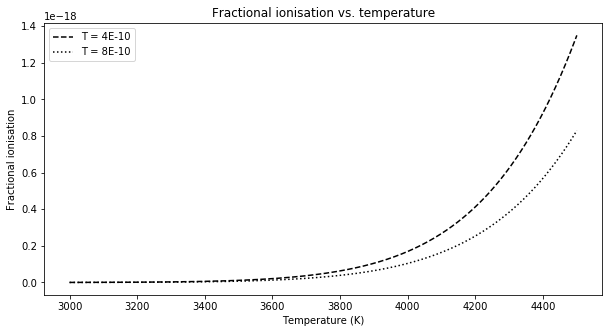

In [34]:
# plot
plt.figure(figsize=(10,5))
plt.plot(T, X[0,:], label='T = 4E-10', linestyle='--', c='k')
plt.plot(T, X[1,:], label='T = 8E-10', linestyle=':', c='k')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Fractional ionisation')
plt.title('Fractional ionisation vs. temperature')

How much does the change in $\eta$ affect the computed value of $T_{recomb}$ if we define $T_{recomb}$ via $X(T_{recomb}) = 0.5$?

In [37]:
# solve for T_recomb; at what T does X=0.5?
T = np.linspace(3000, 100000, 3000)


count = 0
for eta in etas:
    right = rhs(T=T, eta=eta)
    # it's a quadratic now
    x1, x2 = quad(1, right, right)
    # we want the positive root only
    if x1[0] > 0:
        X[count, :] = x1
    else:
        X[count, :] = x2
    count += 1

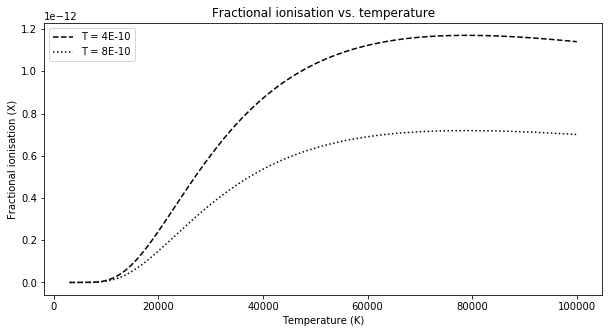

In [41]:
# plot
plt.figure(figsize=(10,5))
plt.plot(T, X[0,:], label='T = 4E-10', linestyle='--', c='k')
plt.plot(T, X[1,:], label='T = 8E-10', linestyle=':', c='k')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Fractional ionisation (X)')
plt.title('Fractional ionisation vs. temperature')

# TODO: fix this ^ why is the y axis on such a small scale?

## Question 2

The statistical fluctuations or anisotropies in the CMB can be plotted as the temperature power spectrum (Figure 1). Assuming that the age of the universe at CMB creation was $t_{CMB} = 350000$ years and that the sound speed of the photon baryon fluid is $c_s = c/3$, compute the apparent angular scale (in degrees) of the first peak in the power spectrum. You may assume the expansion history of the universe up until that epoch is described by a matter dominated Einstein-de Sitter cosmology.

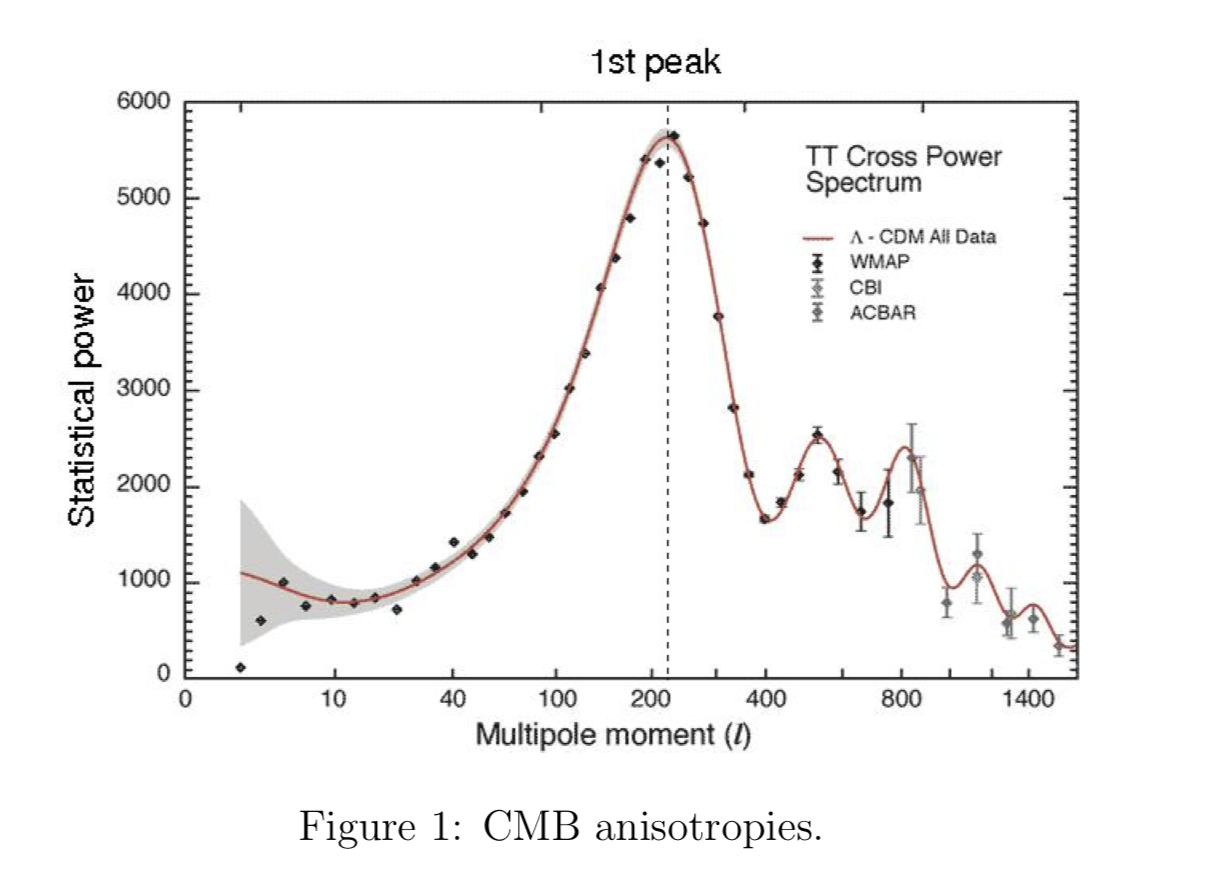